In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
df = pd.read_csv('Crop_recommendation (1).csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [153]:
ds = df.copy()
ds.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [154]:
ds.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [155]:
ds.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [156]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [157]:
ds.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [158]:
ds.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [159]:
ds.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

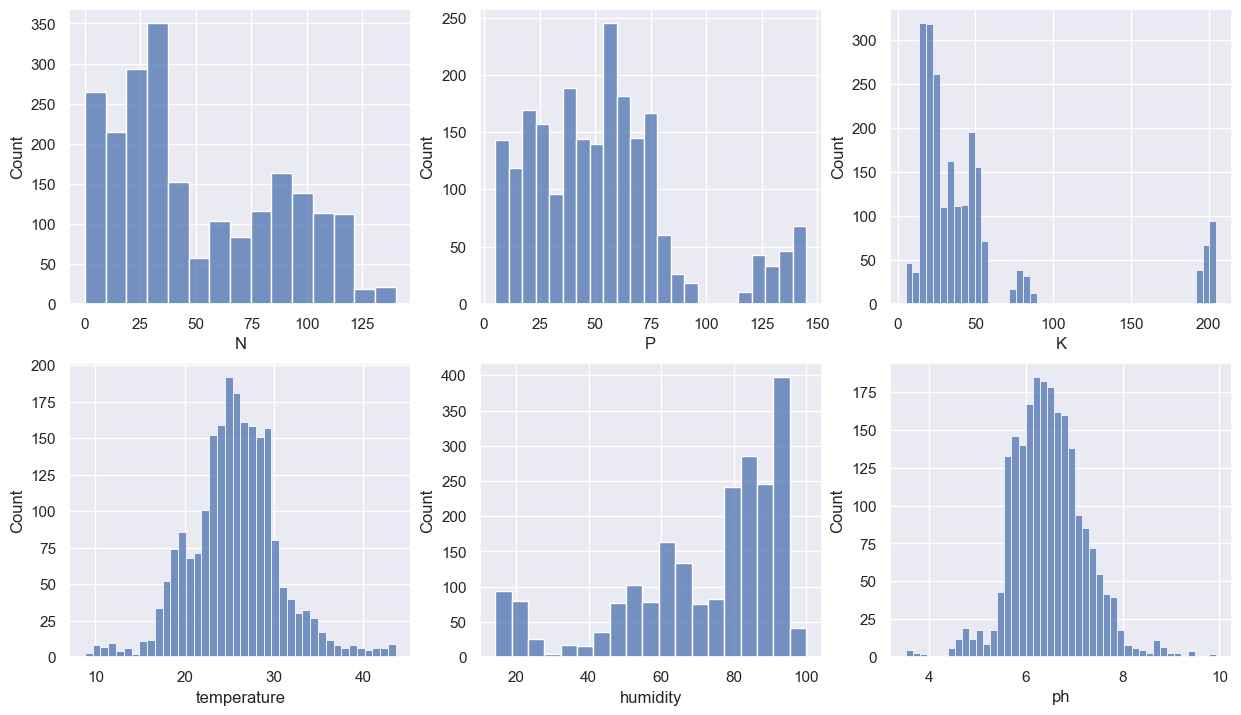

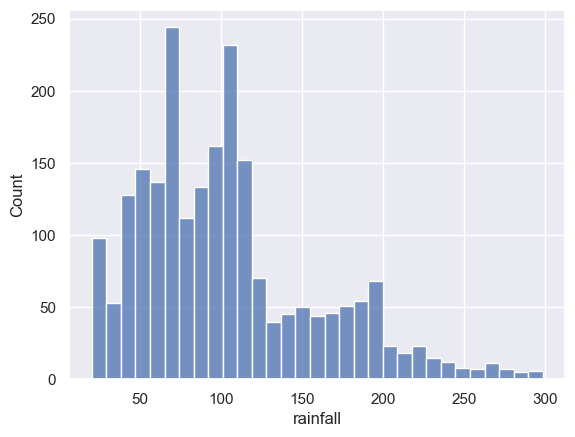

In [160]:
all_columns = ds.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(ds[column])
    i+=1
plt.show()

sns.histplot(ds[all_columns[-1]])
plt.show()

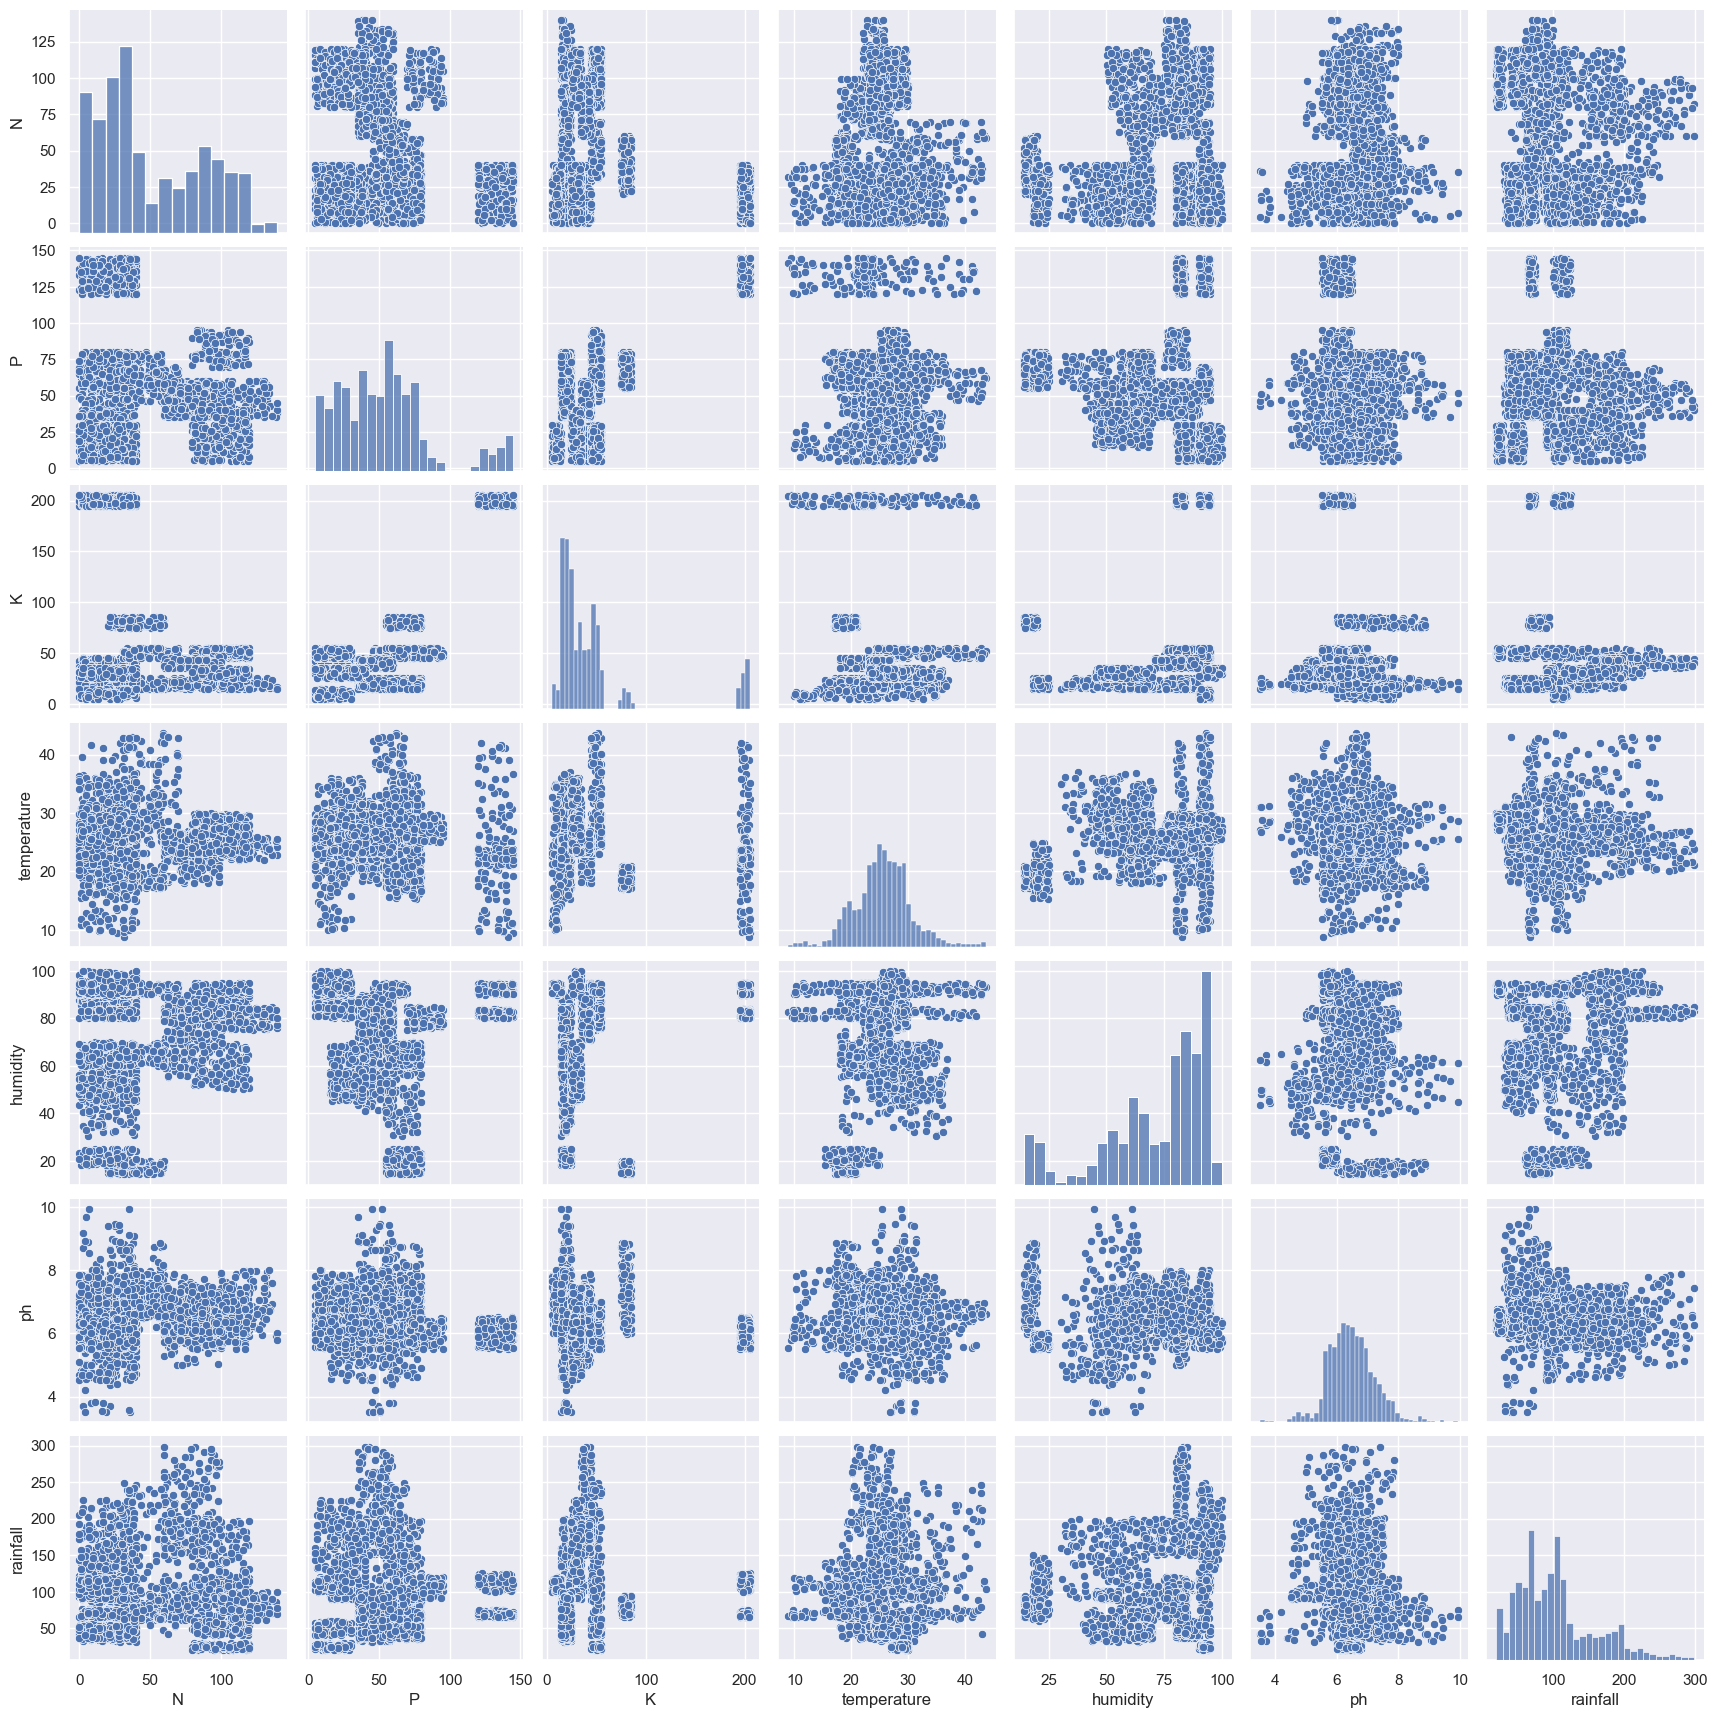

In [161]:
p = sns.pairplot(ds)


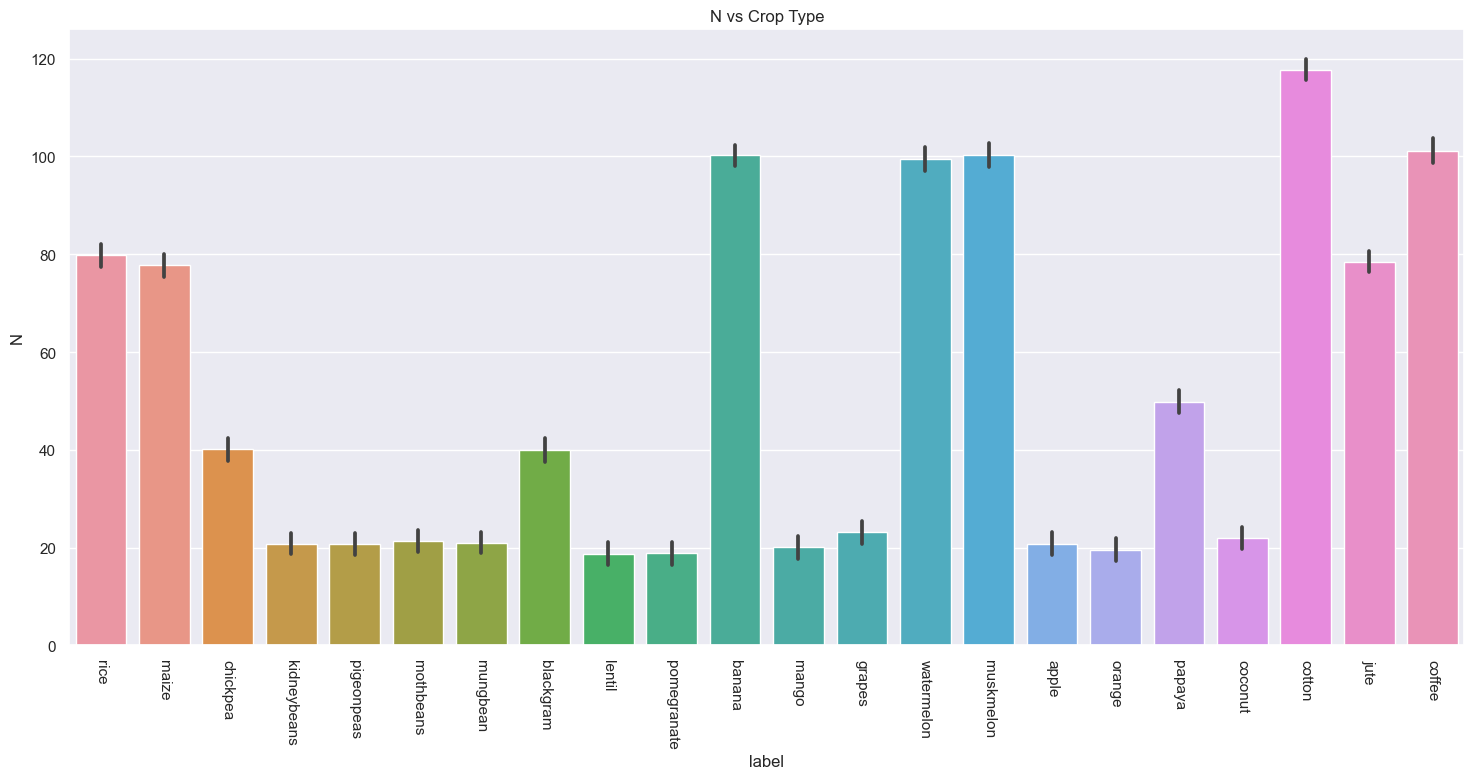

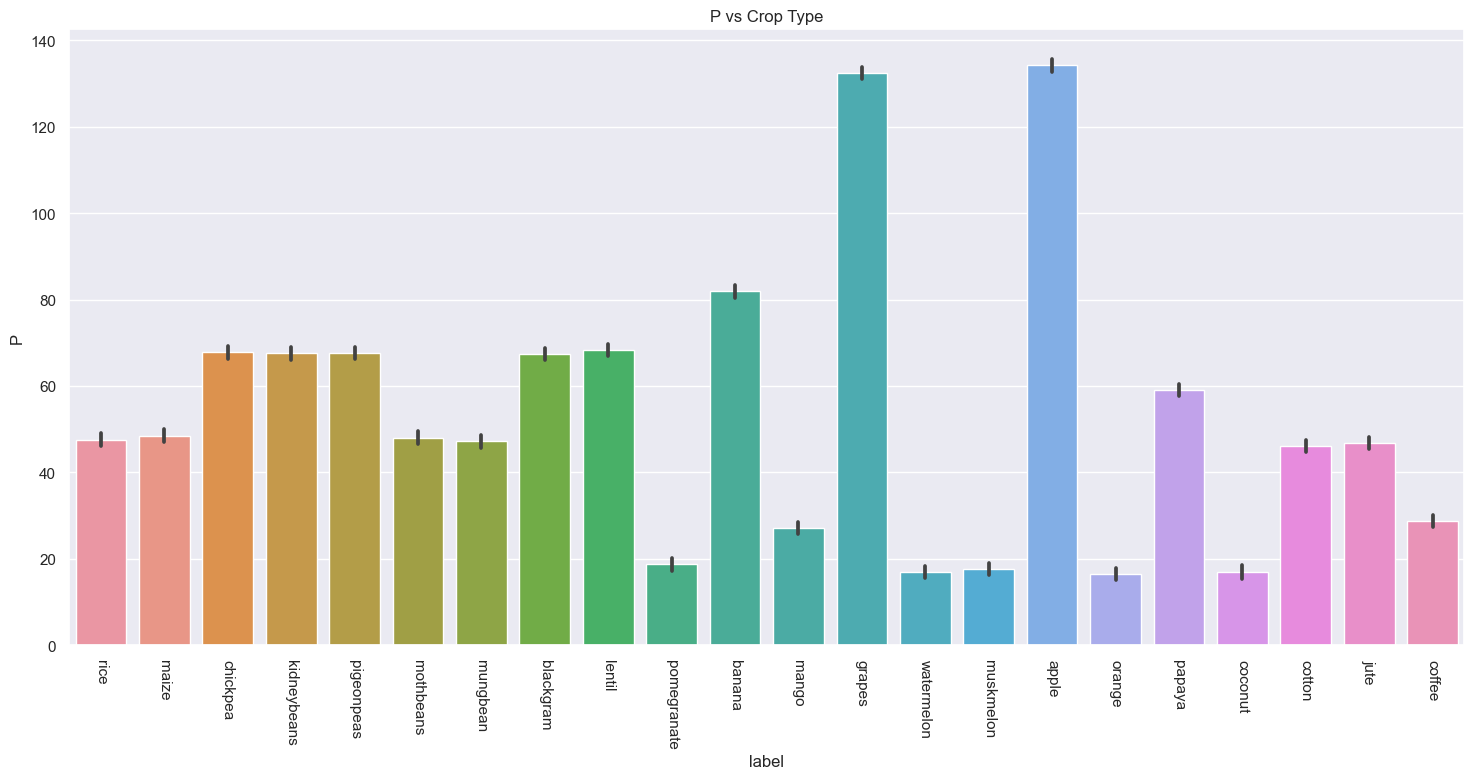

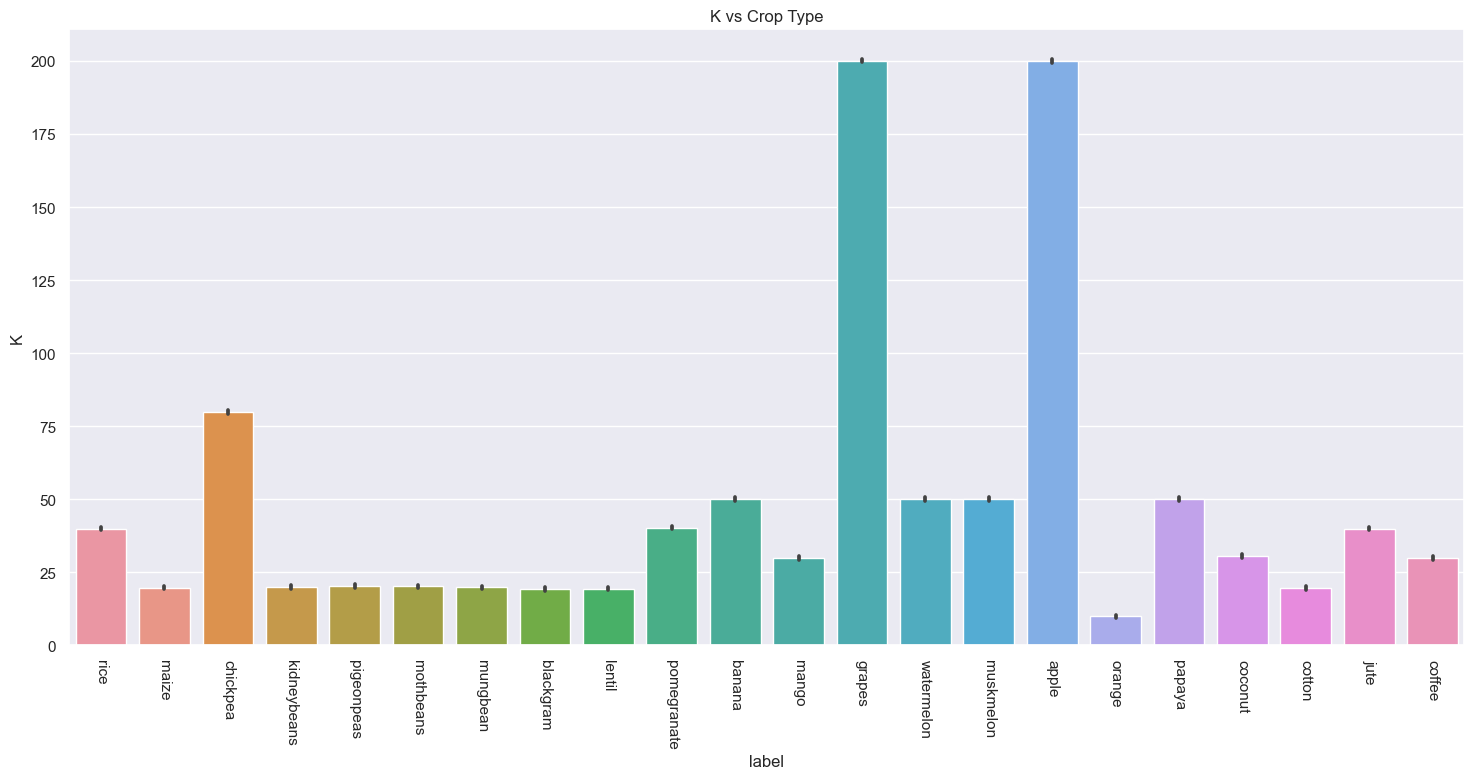

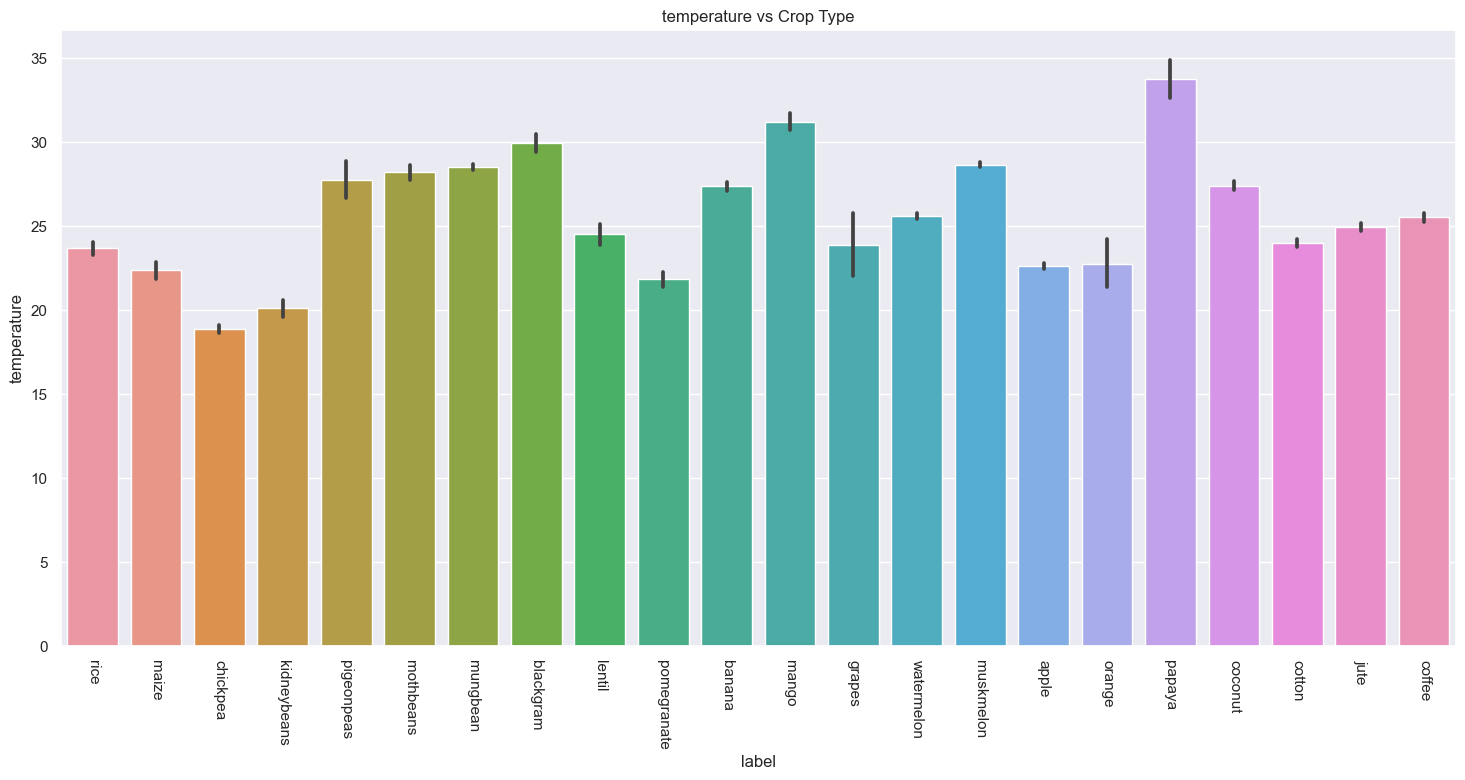

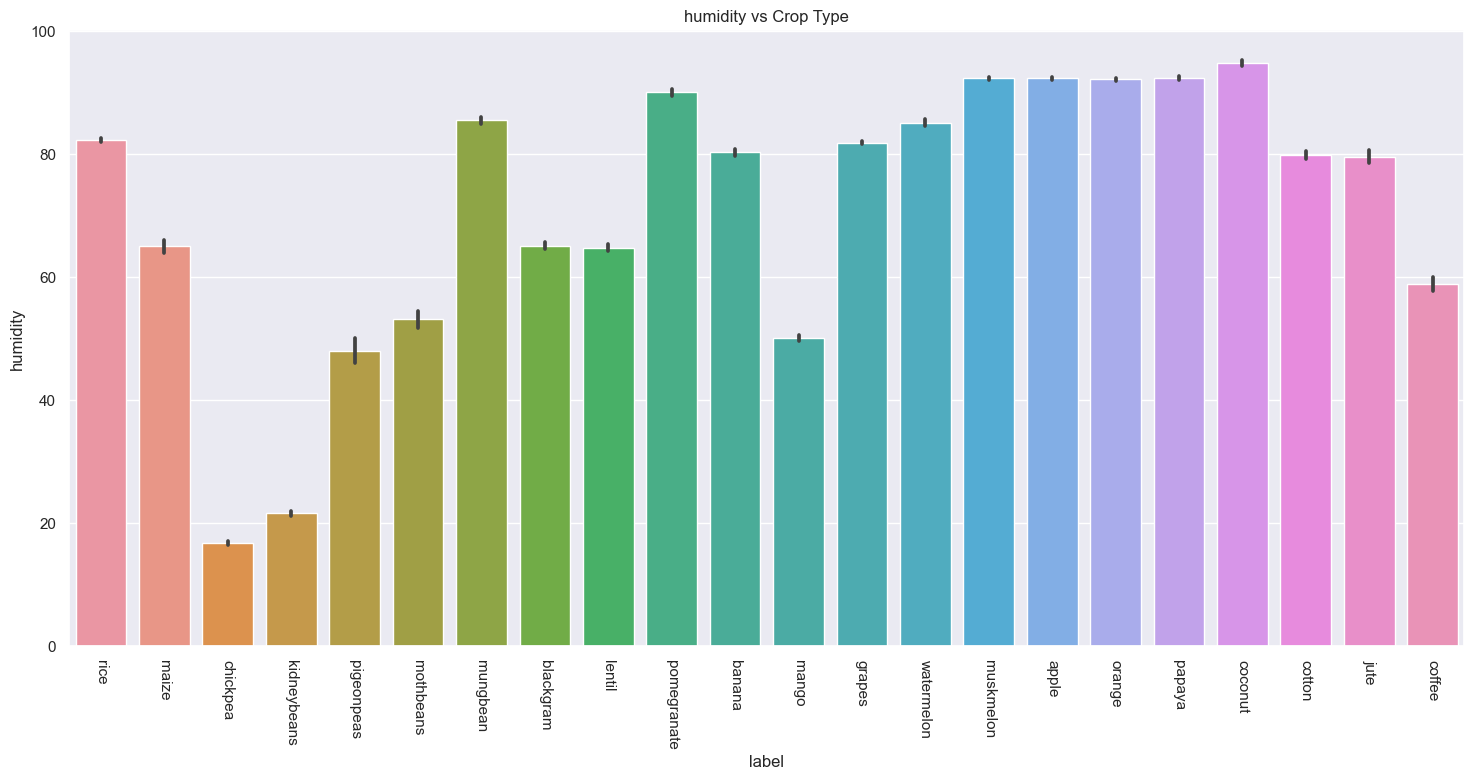

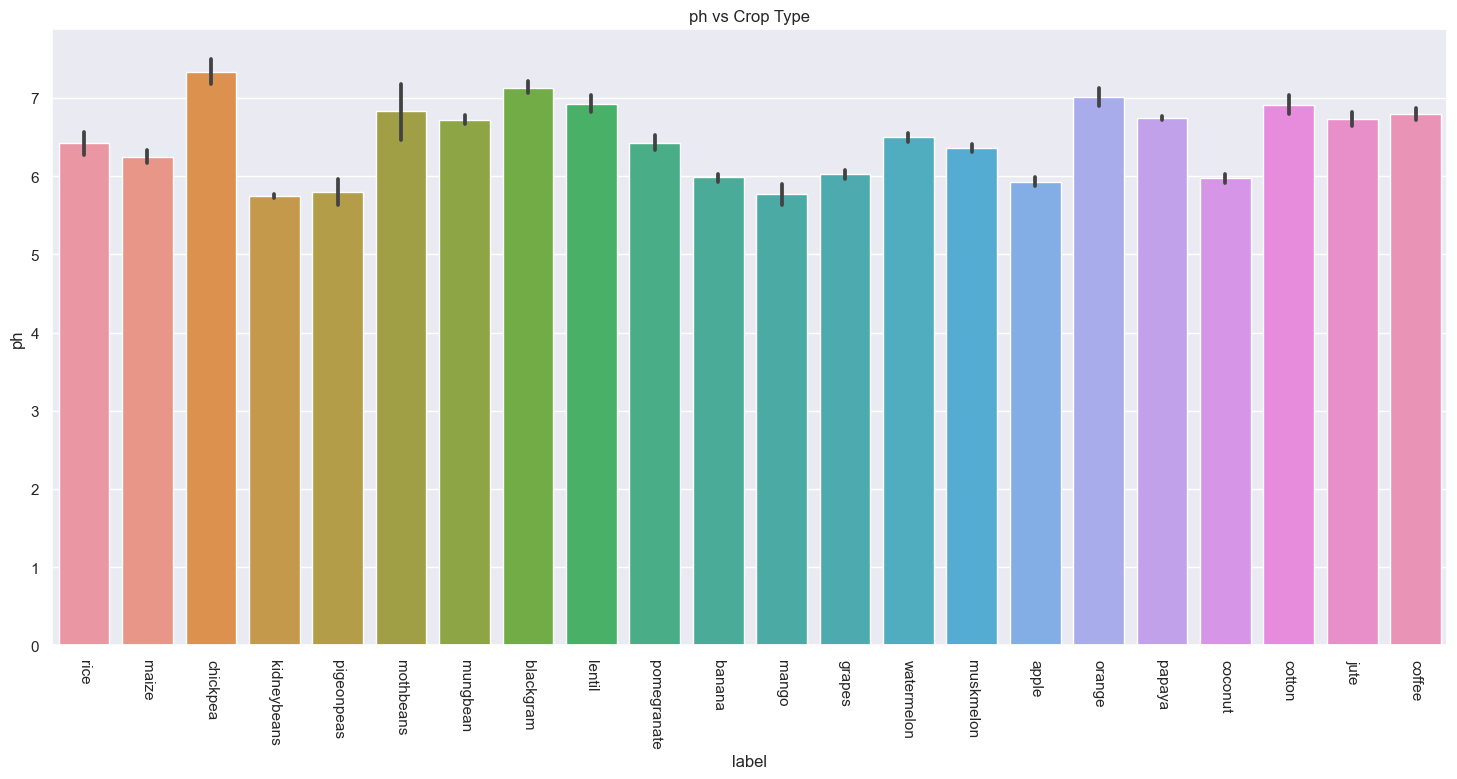

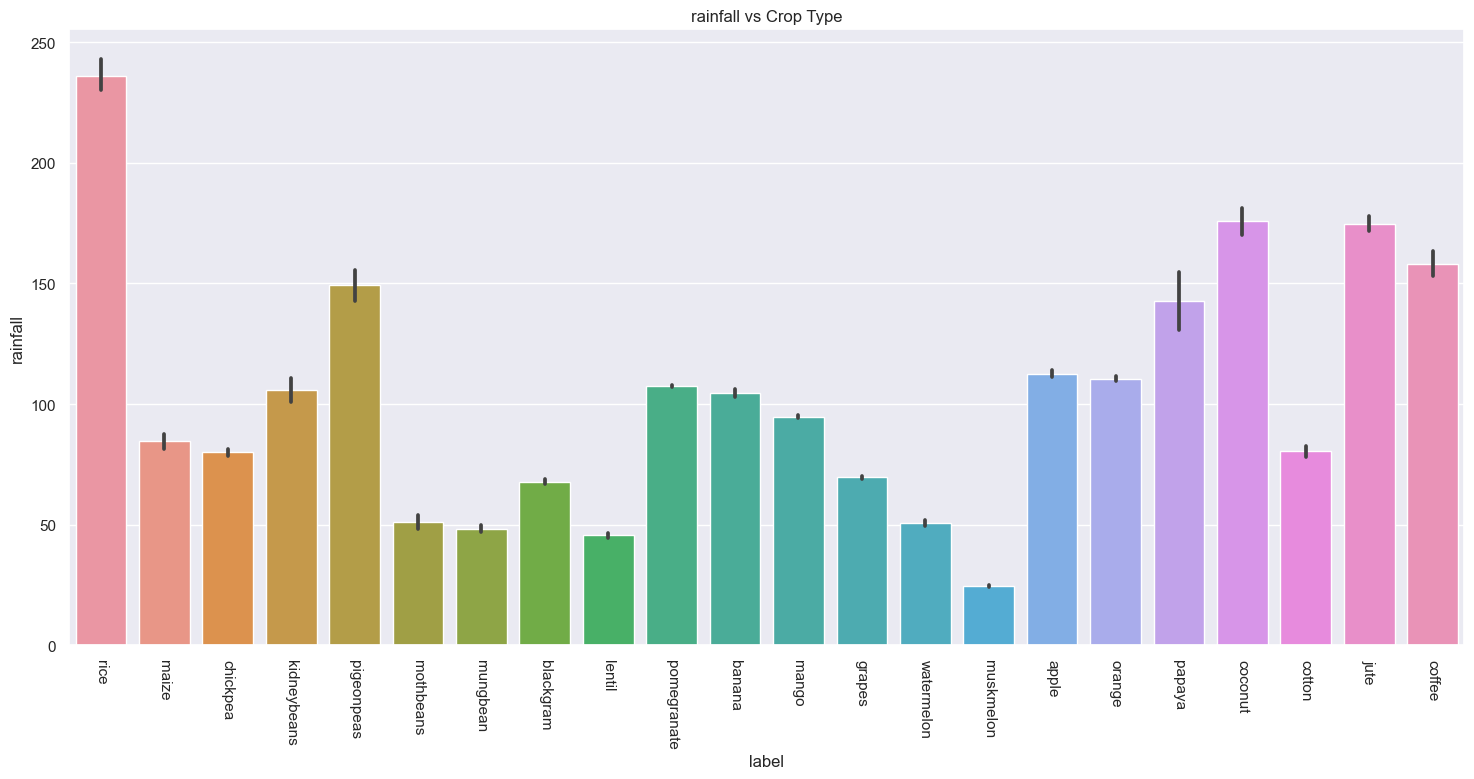

In [162]:
for column in all_columns:
    plt.figure(figsize=(18,8))
    sns.barplot(x = "label", y = column, data = ds)
    plt.xticks(rotation=270)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [163]:
encoded = {}
for label in ds:
    encoder = LabelEncoder()
    ds['label'] = encoder.fit_transform(ds['label'])
    encoded['Label_encoder'] = encoder
    joblib.dump(encoder, open('Label_encoder.pkl', 'wb'))

encoded

{'Label_encoder': LabelEncoder()}

In [164]:
ds.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [165]:
ds.corr()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


In [166]:
# plt.figure(figsize= (18, 10))
# sns.heatmap(ds.corr(), annot =True)
# plt.title('Correlation Matrix')
# plt.show()

In [167]:
from sklearn.utils import shuffle
ds  = shuffle(ds,random_state=5)
ds.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,7
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,15
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,4
293,35,63,76,17.815645,17.607566,7.714153,90.820976,3
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,21


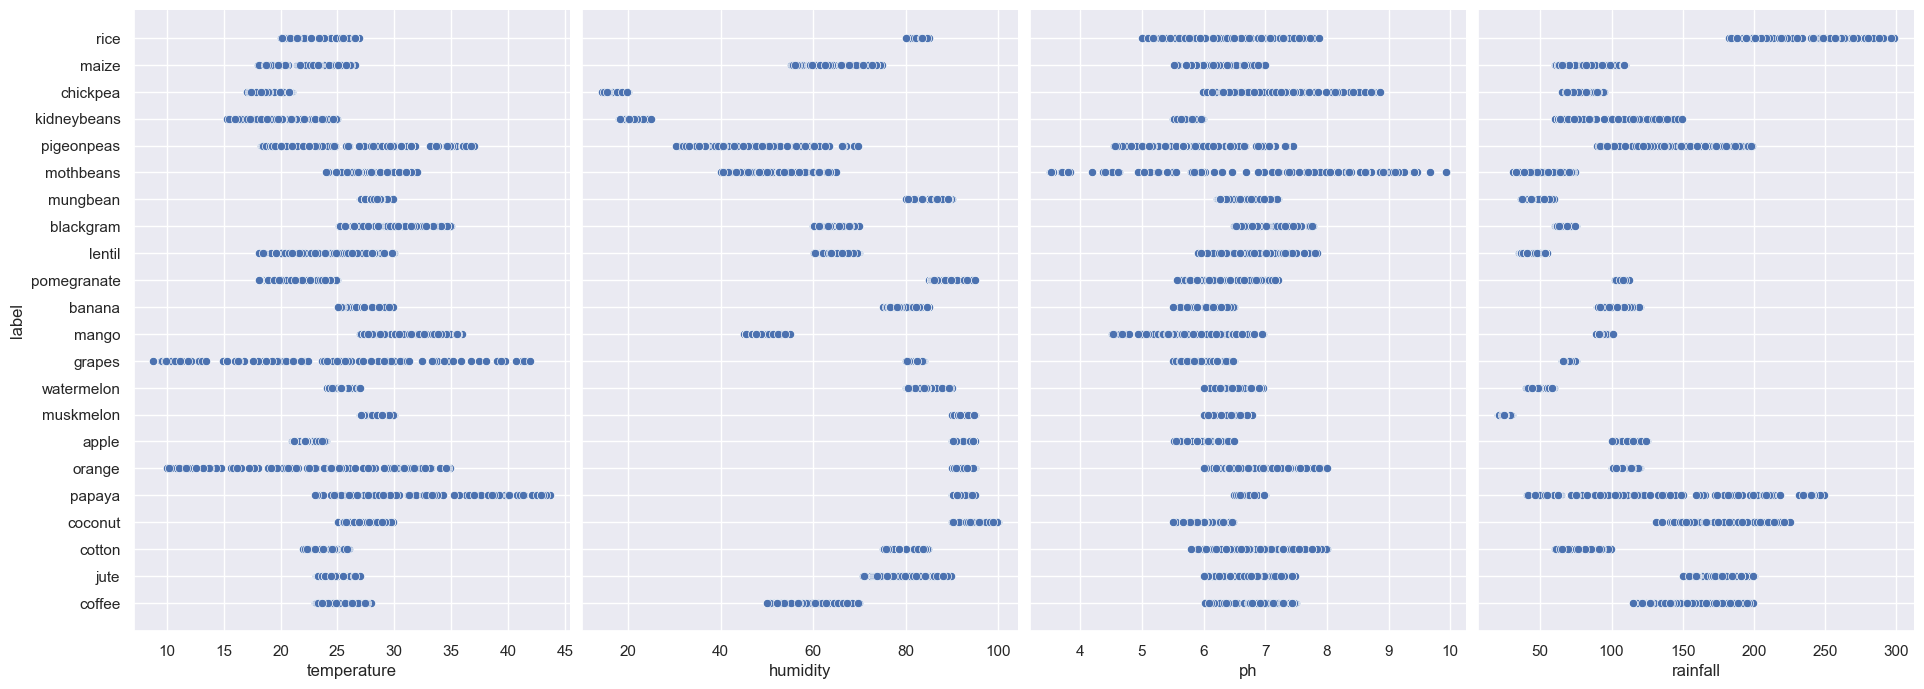

In [168]:
p = sns.pairplot(df, x_vars=['temperature',	'humidity',	'ph',	'rainfall'], y_vars='label', height=7, aspect=0.7)

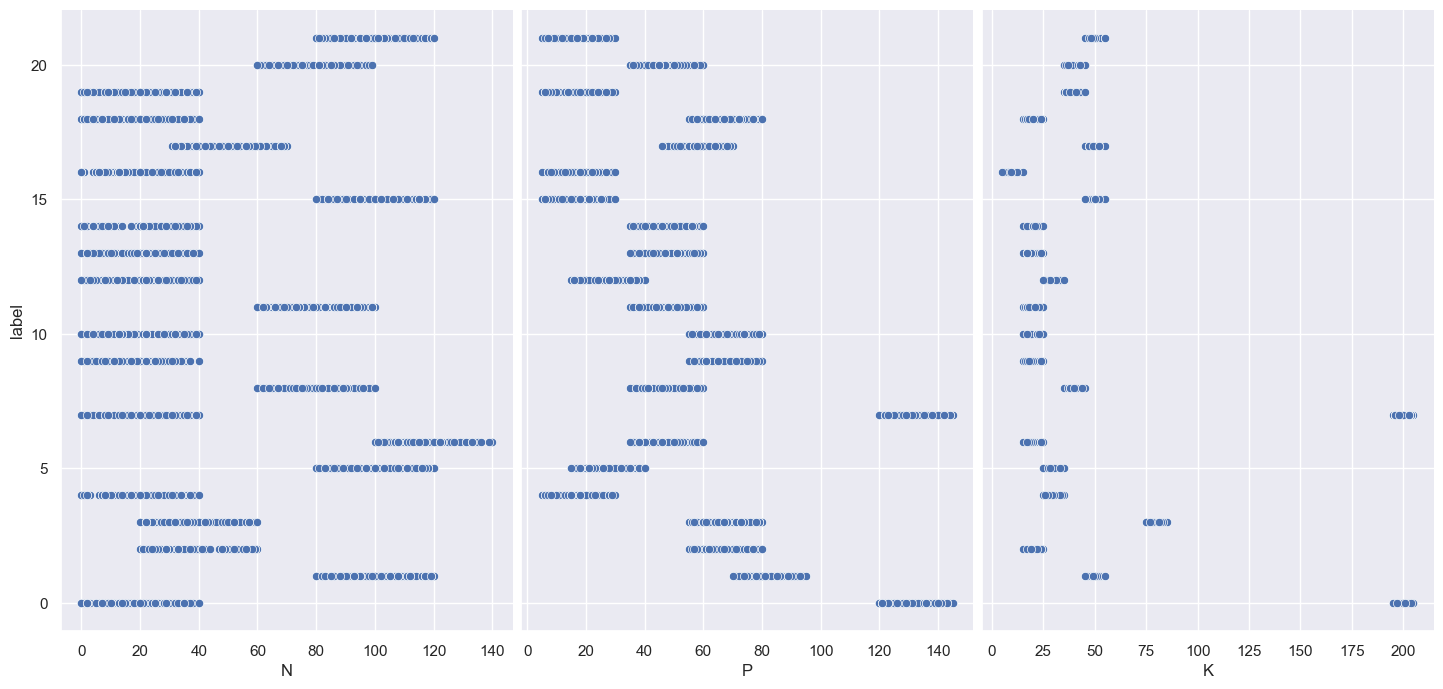

In [183]:
p = sns.pairplot(ds, x_vars=['N', 'P','K'], y_vars='label', height=7, aspect=0.7)


In [170]:
x = ds.drop('label', axis=1)
y = ds['label']

xtrain, xtest, ytrain, ytest =  train_test_split(x, y, test_size=.25, random_state=42)

In [171]:
lr_model = LogisticRegression()
lr_model.fit(xtrain, ytrain)
cross_validation = lr_model.predict(xtrain)
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        69
           2       0.88      0.91      0.89        64
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       0.96      0.91      0.94        88
           7       1.00      1.00      1.00        77
           8       0.93      0.89      0.91        79
           9       1.00      1.00      1.00        73
          10       0.96      0.97      0.97        74
          11       0.88      0.93      0.91        74
          12       1.00      1.00      1.00        70
          13       0.91      0.91      0.91        74
          14       1.00      0.97      0.99        79
          15       1.00      1.00      1.00        76
          16       1.00      1.00      1.00        72
          17       0.97    

In [172]:
prediction = lr_model.predict(xtest)
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.97      0.98        32
           2       0.79      0.96      0.87        28
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      0.96      0.98        25
           6       1.00      0.89      0.94        19
           7       1.00      1.00      1.00        23
           8       0.84      0.84      0.84        25
           9       1.00      1.00      1.00        27
          10       0.92      1.00      0.96        23
          11       0.82      0.95      0.88        19
          12       1.00      1.00      1.00        30
          13       1.00      0.79      0.88        33
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        28
          17       0.95    

In [184]:
joblib.dump(lr_model, open('Crop_Model.pkl', 'wb'))

In [187]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [188]:
ds['label'].value_counts()

label
7     100
15    100
12    100
9     100
14    100
1     100
20    100
16    100
8     100
5     100
13    100
6     100
2     100
11    100
0     100
18    100
19    100
17    100
21    100
3     100
4     100
10    100
Name: count, dtype: int64